In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visualización
sns.set(style="whitegrid")

ruta_dataset = r"C:/DATE_SET_CENTRO_COMERCIAL/Mall_Customers.csv"  # Ruta

# Cargar el dataset
try:
    data = pd.read_csv(ruta_dataset)
    print("Dataset cargado exitosamente:")
    print(data.head())  # Muestra las primeras filas para confirmar la carga
        
    # Identificar el tipo de datos para cada columna
    print("\nTipos de datos para cada columna:")
    print(data.dtypes)

    # Convertir la columna 'Gender' de object a string
    data['Gender'] = data['Gender'].astype(str)
    print("\nColumna 'Gender' convertida a string:")
    print(data['Gender'].dtypes)

    # Eliminar la columna 'CustomerID'
    data.drop(columns=['CustomerID'], inplace=True)
    print("\nColumna 'CustomerID' eliminada. Datos restantes:")
    print(data.head())

    # Contar las filas y columnas que quedan
    filas, columnas = data.shape
    print(f"\nNúmero de filas restantes: {filas}")
    print(f"Número de columnas restantes: {columnas}")

except FileNotFoundError:
    print("Error: No se encontró el archivo en la ruta especificada.")
except Exception as e:
    print(f"Ocurrió un error al cargar el dataset: {e}")


Dataset cargado exitosamente:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Tipos de datos para cada columna:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Columna 'Gender' convertida a string:
object

Columna 'CustomerID' eliminada. Datos restantes:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       

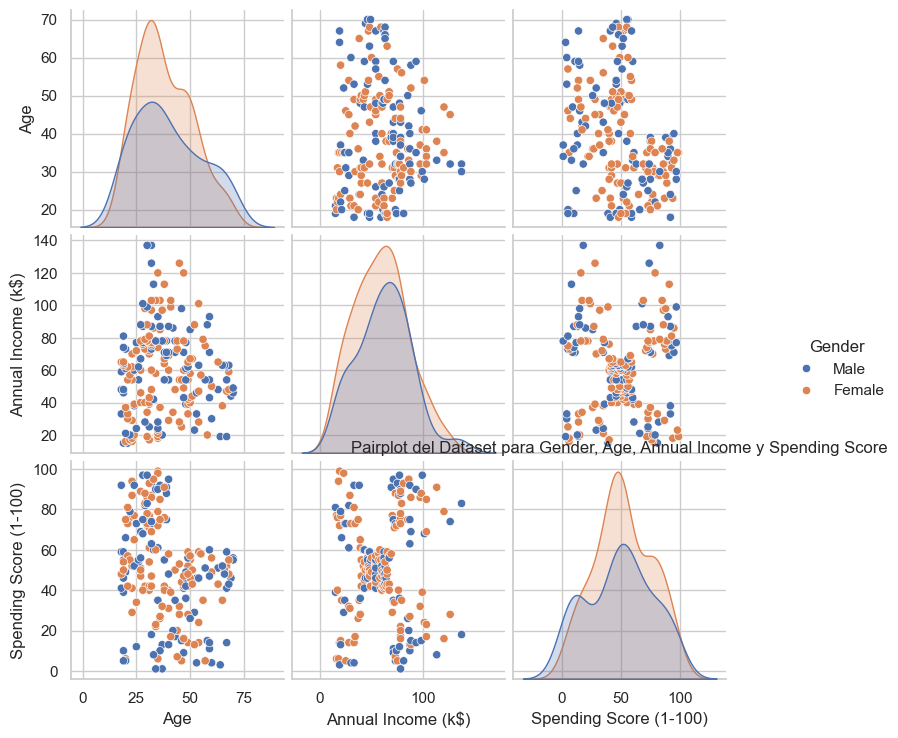

In [72]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    columnas_seleccionadas = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    data_seleccionado = data[columnas_seleccionadas]

    # Pairplot
    sns.pairplot(data_seleccionado, hue='Gender') 
    plt.title("Pairplot del Dataset para Gender, Age, Annual Income y Spending Score")
    plt.show()

except NameError:
    print("Error: El DATA SET")
except Exception as e:
    print(f" Error al generar el pairplot: {e}")


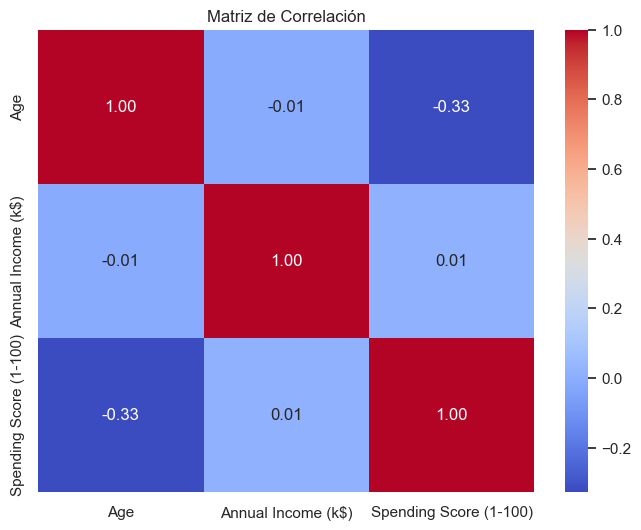

In [75]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
try:
    
    columnas_correlacion = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    data_correlacion = data[columnas_correlacion]

    # Matriz de correlación
    matriz_correlacion = data_correlacion.corr()

    # Visualizar la matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de Correlación")
    plt.show()

except NameError:
    print("Error con el DataSET.")
except Exception as e:
    print(f"Error al generar la matriz de correlación: {e}")


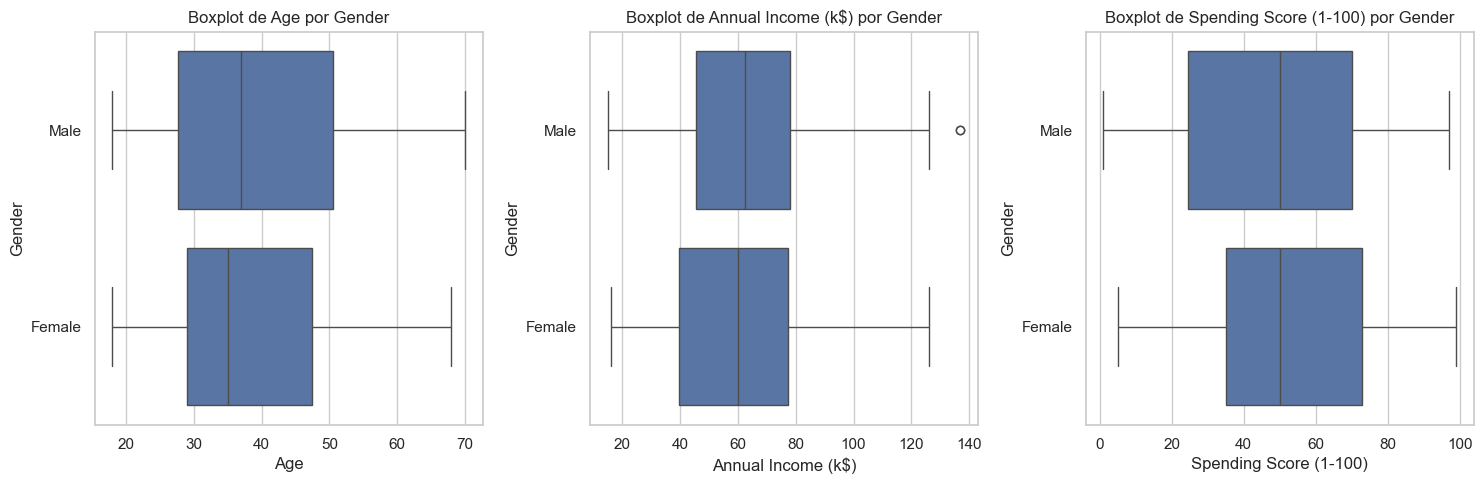

In [77]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Generar los boxplots
    columnas_boxplot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    
    # Crear boxplots para cada variable
    plt.figure(figsize=(15, 5))
    
    for i, columna in enumerate(columnas_boxplot):
        plt.subplot(1, 3, i + 1)  # subgráfica
        sns.boxplot(x=data[columna], y=data['Gender'])  # Diagrama de caja por género
        plt.title(f'Boxplot de {columna} por Gender')
        plt.xlabel(columna)
        plt.ylabel('Gender')

    plt.tight_layout()
    plt.show()

except NameError:
    print("Error con el Data SET")
except Exception as e:
    print(f"Ocurrió un error al generar los boxplots: {e}")


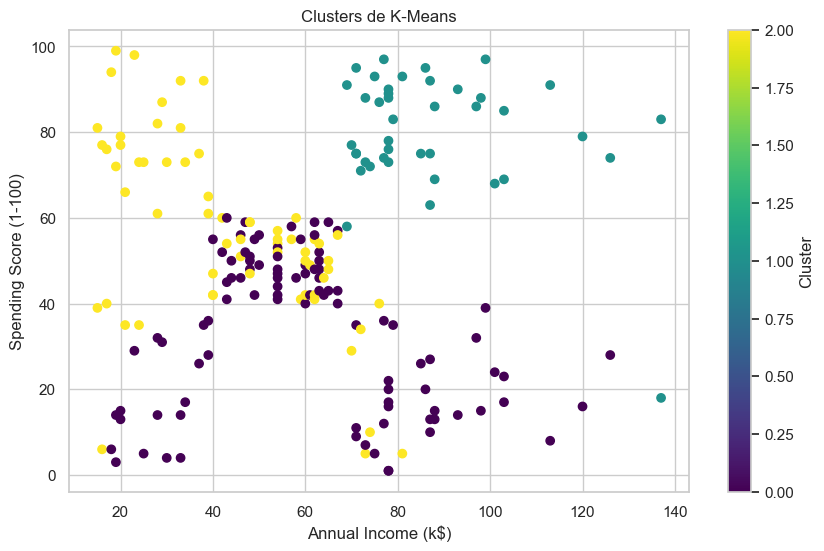

In [3]:
import os

# Evita la fuga de memoria
os.environ["OMP_NUM_THREADS"] = "1"

# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
try:
    # Columnas relevantes para K-Means
    columnas_kmeans = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    data_kmeans = data[columnas_kmeans]

    # Estandarizar los datos
    scaler = StandardScaler()
    data_estandarizado = scaler.fit_transform(data_kmeans)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)  #número de clusters
    kmeans.fit(data_estandarizado)

    data['Cluster'] = kmeans.labels_

    # Visualizar los clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
    plt.title("Clusters de K-Means")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.colorbar(label='Cluster')
    plt.show()

except NameError:
    print("Error en el DATA SET")
except Exception as e:
    print(f"Hay un error al estandarizar los datos o aplicar K-Means: {e}")
